In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [10]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\bryan\AppData\Roaming\Python\Python310\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train= le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes=7)
y_test = to_categorical(y_test,num_classes=7)

In [17]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(7, activation='softmax'))

C:\Users\bryan\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test,y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 312s 1s/step - accuracy: 0.2338 - loss: 1.8377 - val_accuracy: 0.2583 - val_loss: 1.8120
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 87s 386ms/step - accuracy: 0.2451 - loss: 1.8131 - val_accuracy: 0.2399 - val_loss: 1.7802
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 95s 421ms/step - accuracy: 0.2649 - loss: 1.7707 - val_accuracy: 0.3440 - val_loss: 1.6442
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 95s 419ms/step - accuracy: 0.3333 - loss: 1.6631 - val_accuracy: 0.4162 - val_loss: 1.4978
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 97s 428ms/step - accuracy: 0.3860 - loss: 1.5512 - val_accuracy: 0.4520 - val_loss: 1.4151
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 95s 419ms/step - accuracy: 0.4249 - loss: 1.4866 - val_accuracy: 0.4867 - val_loss: 1.3443
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 101s 447ms/step - accuracy: 0.4486 - loss: 1.4317 - val_accuracy: 0.5010 - val_loss: 1.2970
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 106s 468ms/step - accuracy: 0.4629 -

KeyboardInterrupt: 

In [20]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [21]:
from keras.models import model_from_json

In [22]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [23]:
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [24]:
from tensorflow.keras.preprocessing.image import img_to_array

def ef(image_path):
    img = load_img(image_path, target_size=(48, 48), color_mode='grayscale')
    img = img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img

In [25]:
image = 'images/train/disgust/299.jpg'
print("original image is disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
model prediction is  disgust


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
model prediction is  disgust


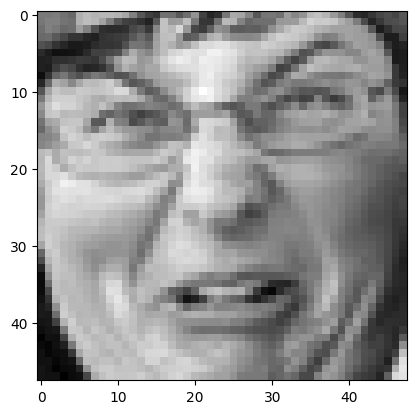

In [29]:
image = 'images/train/disgust/299.jpg'
print("original image is disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')